In [30]:
from keras.models import load_model
import matplotlib.pyplot as plt
from skimage import transform
from skimage import exposure
from skimage import io
from imutils import paths
import numpy as np
import imutils
import random
import cv2
import os

In [2]:
model = load_model('model/model11-0.94.h5')

In [4]:
# load the label names
labelNames = open("signnames.csv").read().strip().split("\n")[1:]
labelNames = [l.split(",")[1] for l in labelNames]

In [ ]:
imagePaths = list(paths.list_images("dataset/Test")
random.shuffle(imagePaths)
imagePaths = imagePaths[:25]

In [19]:
imagePaths = []
for i in list(os.listdir("dataset/Test")):
    imagePaths.append("dataset/Test/" + i) 

In [21]:
imagePaths[0]

'dataset/Test/08794.png'

In [70]:
def predict(imagePath):
    image = io.imread(imagePath)
    image = transform.resize(image, (32, 32))
    image = exposure.equalize_adapthist(image, clip_limit=0.1)

    image = image.astype("float32") / 255.0
    image = np.expand_dims(image, axis=0)

    preds = model.predict(image)
    prediction = preds.argmax(axis=1)[0]
    label = labelNames[prediction]

    image = cv2.imread(imagePath)
    image = imutils.resize(image, width=128)
    
    cv2.putText(image, label, (5, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
    
    return image

In [71]:
res = predict(imagePaths[3])

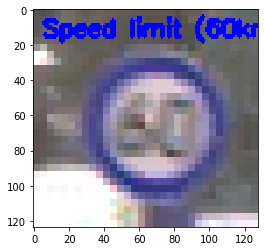

In [72]:
plt.imshow(res)
plt.show()

In [69]:
res.shape

(31, 32, 3)